Bubble Sort: [11, 12, 22, 25, 64]
Selection Sort: [11, 12, 22, 25, 64]
Insertion Sort: [11, 12, 22, 25, 64]


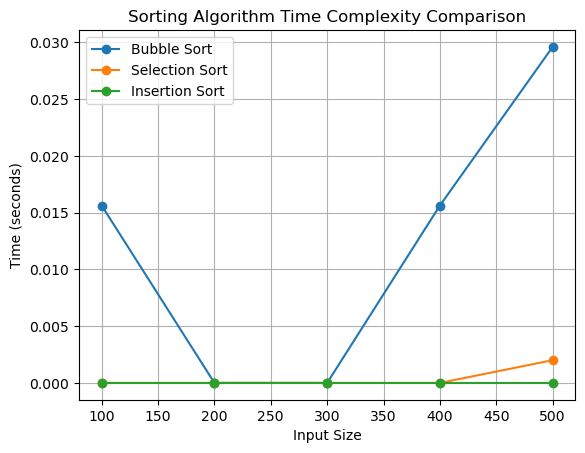

In [1]:
# Task 1: Implementing and Analyzing Sorting Algorithms

import time
import random
import matplotlib.pyplot as plt

def bubble_sort(arr):
    arr = arr.copy()
    n = len(arr)
    for i in range(n):
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
    return arr

def selection_sort(arr):
    arr = arr.copy()
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr

def insertion_sort(arr):
    arr = arr.copy()
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >=0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

def measure_time(func, arr):
    start = time.time()
    func(arr)
    end = time.time()
    return end - start

def run_comparison():
    sizes = [100, 200, 300, 400, 500]
    bubble_times = []
    selection_times = []
    insertion_times = []

    for size in sizes:
        arr = random.sample(range(1, size * 10), size)

        bubble_times.append(measure_time(bubble_sort, arr))
        selection_times.append(measure_time(selection_sort, arr))
        insertion_times.append(measure_time(insertion_sort, arr))

    plt.plot(sizes, bubble_times, label='Bubble Sort', marker='o')
    plt.plot(sizes, selection_times, label='Selection Sort', marker='o')
    plt.plot(sizes, insertion_times, label='Insertion Sort', marker='o')
    plt.title('Sorting Algorithm Time Complexity Comparison')
    plt.xlabel('Input Size')
    plt.ylabel('Time (seconds)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example output for a small array
arr = [64, 25, 12, 22, 11]
print("Bubble Sort:", bubble_sort(arr))
print("Selection Sort:", selection_sort(arr))
print("Insertion Sort:", insertion_sort(arr))

# Run the performance comparison and plot
run_comparison()


Quick Sort Result: [3, 9, 10, 27, 38, 43, 82]
Merge Sort Result: [3, 9, 10, 27, 38, 43, 82]


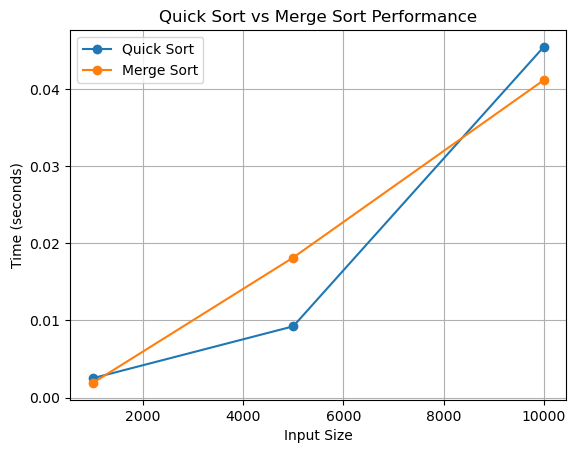

In [2]:
# Task 2: Implementing Quick Sort and Merge Sort with Performance Comparison

import random
import time
import matplotlib.pyplot as plt

# Merge Sort
def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)

def merge(left, right):
    result = []
    l = r = 0
    while l < len(left) and r < len(right):
        if left[l] < right[r]:
            result.append(left[l])
            l += 1
        else:
            result.append(right[r])
            r += 1
    result.extend(left[l:])
    result.extend(right[r:])
    return result

# Quick Sort
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[0]
    lesser = [x for x in arr[1:] if x <= pivot]
    greater = [x for x in arr[1:] if x > pivot]
    return quick_sort(lesser) + [pivot] + quick_sort(greater)

# Measure execution time
def measure_time(sort_func, arr):
    start = time.time()
    sort_func(arr.copy())
    end = time.time()
    return end - start

# Compare performance
def compare_sorts():
    sizes = [1000, 5000, 10000]
    quick_times = []
    merge_times = []

    for size in sizes:
        arr = random.sample(range(size * 10), size)
        quick_times.append(measure_time(quick_sort, arr))
        merge_times.append(measure_time(merge_sort, arr))

    plt.plot(sizes, quick_times, label='Quick Sort', marker='o')
    plt.plot(sizes, merge_times, label='Merge Sort', marker='o')
    plt.title('Quick Sort vs Merge Sort Performance')
    plt.xlabel('Input Size')
    plt.ylabel('Time (seconds)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example input & output
arr = [38, 27, 43, 3, 9, 82, 10]
print("Quick Sort Result:", quick_sort(arr))
print("Merge Sort Result:", merge_sort(arr))

# Run performance comparison
compare_sorts()


In [3]:
#Task 3: Implementing Heap Sort and Counting Sort for Large Datasets

import random
import time

# Heap Sort Implementation
def heapify(arr, n, i):
    largest = i  # Max-heap root
    left = 2 * i + 1
    right = 2 * i + 2

    if left < n and arr[left] > arr[largest]:
        largest = left
    if right < n and arr[right] > arr[largest]:
        largest = right

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heap_sort(arr):
    n = len(arr)

    # Build max heap
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    # Heap sort
    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]  # Swap root with last
        heapify(arr, i, 0)

    return arr

# Counting Sort Implementation
def counting_sort(arr):
    if not arr:
        return []

    max_val = max(arr)
    min_val = min(arr)
    range_size = max_val - min_val + 1
    count = [0] * range_size
    output = [0] * len(arr)

    for num in arr:
        count[num - min_val] += 1

    for i in range(1, len(count)):
        count[i] += count[i - 1]

    for num in reversed(arr):
        output[count[num - min_val] - 1] = num
        count[num - min_val] -= 1

    return output

# Comparison Function
def compare_sorting_algorithms():
    sizes = [10000, 50000, 100000]
    for size in sizes:
        print(f"\nDataset size: {size}")
        data1 = [random.randint(0, 100000) for _ in range(size)]
        data2 = data1.copy()

        # Heap Sort
        start = time.time()
        heap_sort(data1.copy())
        print(f"Heap Sort time: {time.time() - start:.4f} seconds")

        # Counting Sort (if value range is acceptable)
        if max(data2) - min(data2) <= 100000:
            start = time.time()
            counting_sort(data2.copy())
            print(f"Counting Sort time: {time.time() - start:.4f} seconds")
        else:
            print("Counting Sort skipped due to large value range")

# Example Usage and Output
if __name__ == "__main__":
    arr = [4, 10, 3, 5, 1]
    print("Heap Sort:", heap_sort(arr.copy()))  # Output: [1, 3, 4, 5, 10]

    arr2 = [1, 4, 1, 2, 7, 5, 2]
    print("Counting Sort:", counting_sort(arr2.copy()))  # Output: [1, 1, 2, 2, 4, 5, 7]

    compare_sorting_algorithms()


Heap Sort: [1, 3, 4, 5, 10]
Counting Sort: [1, 1, 2, 2, 4, 5, 7]

Dataset size: 10000
Heap Sort time: 0.1012 seconds
Counting Sort time: 0.0262 seconds

Dataset size: 50000
Heap Sort time: 0.2951 seconds
Counting Sort time: 0.0234 seconds

Dataset size: 100000
Heap Sort time: 0.6653 seconds
Counting Sort time: 0.0478 seconds
